In [10]:
# High-level section header: mean |L_k| scaling and distributions
# LK MEAN AND DISTRIBUTION

In [11]:
# Imports for plotting, numerics, fitting, and special functions
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import gamma, gammaln
import mpmath as mp

In [12]:
# Load precomputed datasets: mean |L_k| vs N and distributions for selected sizes
abs_lk_mean=np.loadtxt('abs_lk_mean_for_plot.dat')
abs_lk_distribution_10x10x10=np.loadtxt('abs_lk_int_approx_distribution_10x10x10_1000data_10blocks.dat')
abs_lk_distribution_20x20x20=np.loadtxt('abs_lk_int_approx_distribution_20x20x20_1000data_10blocks.dat')
abs_lk_distribution_80x80x80=np.loadtxt('abs_lk_int_approx_distribution_80x80x80_1000data_10blocks.dat')
abs_lk_distribution_50x50x50=np.loadtxt('abs_lk_int_approx_distribution_50x50x50_1000data_10blocks.dat')
abs_lk_distribution_100x100x100=np.loadtxt('abs_lk_int_approx_distribution_100x100x100_1000data_10blocks.dat')

In [13]:
# Simple power-law model used to fit mean |L_k| scaling
def power_law(x, a, b):
    return a * x**b

Fitted parameters: a = 0.13386099649055533 ± 0.016014801943685465, b = 0.2534339712347097 ± 0.010087739866551731
Fitted parameters: a = 0.13355113440950248 ± 0.010108919296599727, b = 0.2529201957865393 ± 0.006225573282047867
Average fitted parameters: a = 0.1337060654500289 ± 0.009469214997039592, b = 0.2531770835106245 ± 0.0059270620526818635


/var/folders/gz/vpf4zc5n1n3gq7l2_dlvhw_c0000gn/T/ipykernel_9252/3586545181.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


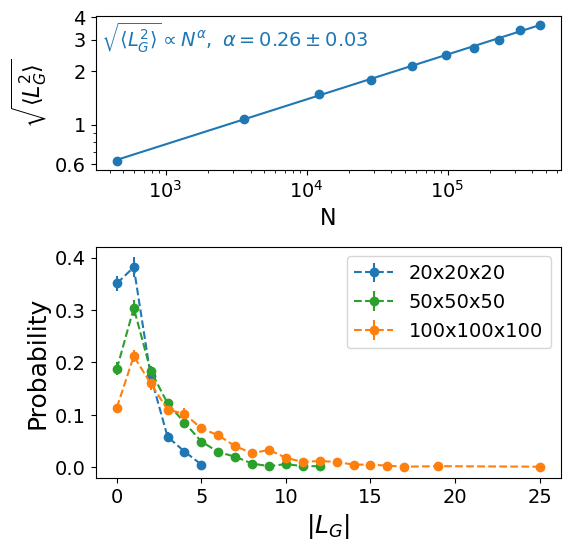

In [14]:
from matplotlib.ticker import ScalarFormatter

# Create combined figure: top panel (mean |L_k| vs N), bottom panel (|L_k| distributions)
fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(6, 6),        # square shape
    gridspec_kw={'height_ratios': [0.4, 0.6], 'hspace': 0.4}  # 40% top, 60% bottom
)

# --- Top panel: mean |L_k| scaling with power-law fit ---
ax1.errorbar(abs_lk_mean[:,0], abs_lk_mean[:,1],
             yerr=abs_lk_mean[:,2], fmt='o', label='mean_abs_lk')

# Fit power law to interleaved subsets to assess stability
params, covariance = curve_fit(power_law, abs_lk_mean[::2,0], abs_lk_mean[::2,1])
a_fit1, b_fit1 = params
a_err1, b_err1 = np.sqrt(np.diag(covariance))
print(f"Fitted parameters: a = {a_fit1} ± {a_err1}, b = {b_fit1} ± {b_err1}")
params, covariance = curve_fit(power_law, abs_lk_mean[1::2,0], abs_lk_mean[1::2,1])
a_fit2, b_fit2 = params
a_err2, b_err2 = np.sqrt(np.diag(covariance))
print(f"Fitted parameters: a = {a_fit2} ± {a_err2}, b = {b_fit2} ± {b_err2}")

# Average parameters from the two fits
a_avg = (a_fit1 + a_fit2) / 2
b_avg = (b_fit1 + b_fit2) / 2
a_err_avg = np.sqrt((a_err1**2 + a_err2**2)) / 2
b_err_avg = np.sqrt((b_err1**2 + b_err2**2)) / 2
print(f"Average fitted parameters: a = {a_avg} ± {a_err_avg}, b = {b_avg} ± {b_err_avg}")

# Reference fit line and annotation
x = np.linspace(450, 450000)
y = 0.136 * x**0.252
ax1.plot(x, y, color='tab:blue')
ax1.text(350, 2.7, r'$\sqrt{\langle L_G^2 \rangle} \propto N^{\alpha},$ $\alpha = 0.26 \pm 0.03$',
         fontsize=14, color='tab:blue')

#ax1.set_xlabel('Length of the linear chains', fontsize=14)
ax1.set_xlabel('N', fontsize=16)
ax1.set_ylabel(r'$\sqrt{\langle L_G^2 \rangle}$', fontsize=16)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_yticks([0.6, 1, 2, 3, 4], ['0.6', '1', '2', '3', '4'], fontsize=14)
#ax1.yaxis.set_major_formatter(ScalarFormatter())
#ax1.ticklabel_format(style='plain', axis='y')

# --- Bottom panel: |L_k| distributions at multiple sizes ---
ax2.errorbar(abs_lk_distribution_20x20x20[:,0],
             abs_lk_distribution_20x20x20[:,1],
             yerr=abs_lk_distribution_20x20x20[:,2],
             fmt='--o', label='20x20x20', color='tab:blue')
ax2.errorbar(abs_lk_distribution_50x50x50[:,0],
             abs_lk_distribution_50x50x50[:,1],
             yerr=abs_lk_distribution_50x50x50[:,2],
             fmt='--o', label='50x50x50', color='tab:green')
ax2.errorbar(abs_lk_distribution_100x100x100[:,0],
             abs_lk_distribution_100x100x100[:,1],
             yerr=abs_lk_distribution_100x100x100[:,2],
             fmt='--o', label='100x100x100', color='tab:orange')

ax2.set_xlabel(r'$|L_G|$', fontsize=18)
ax2.set_ylabel('Probability', fontsize=18)
ax2.tick_params(labelsize=14)
ax2.legend(fontsize=14)

# Layout, save, and display
fig.tight_layout()

# Add horizontal line between the two panels
/#fig.add_artist(plt.Line2D([0.1, 0.9], [0.52, 0.52], color='black', linewidth=1))

plt.savefig("lk_mean_and_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [15]:
#############################################################################################
# LK MATRIX: visualize sparse linking matrices at different resolutions

In [16]:
# Imports for matrix handling (sparse) and plotting layouts
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
import matplotlib.gridspec as gridspec

In [17]:
# Load sparse matrix triplets (row, col, value) for various resolutions and zooms
#data3 = np.loadtxt('matrix_for_plot_10000.dat')
#data2 = np.loadtxt('matrix_for_plot_1000.dat')
#data1 = np.loadtxt('matrix_for_plot_100.dat')
#data1z = np.loadtxt('matrix_for_plot_100_zoom.dat')

data3 = np.loadtxt('matrix_for_plot_100x100x100_length_scale_10000.dat')
data2 = np.loadtxt('matrix_for_plot_100x100x100_length_scale_1000.dat')
data1 = np.loadtxt('matrix_for_plot_100x100x100_length_scale_100.dat')
data1zp = np.loadtxt('matrix_for_plot_100x100x100_length_scale_1000_zoom_positive.dat')
data1zm = np.loadtxt('matrix_for_plot_100x100x100_length_scale_1000_zoom_negative.dat')
data2zp = np.loadtxt('matrix_for_plot_100x100x100_length_scale_100_zoom_positive.dat')
data2zm = np.loadtxt('matrix_for_plot_100x100x100_length_scale_100_zoom_negative.dat')

# Split loaded arrays into indices and values
rows3 = data3[:, 0].astype(int)
cols3 = data3[:, 1].astype(int)
vals3 = data3[:, 2]

rows2 = data2[:, 0].astype(int)
cols2 = data2[:, 1].astype(int)
vals2 = data2[:, 2]

rows1 = data1[:, 0].astype(int)
cols1 = data1[:, 1].astype(int)
vals1 = data1[:, 2]

rows1zp = data1zp[:, 0].astype(int)
cols1zp = data1zp[:, 1].astype(int)
vals1zp = data1zp[:, 2]

rows1zm = data1zm[:, 0].astype(int)
cols1zm = data1zm[:, 1].astype(int)
vals1zm = data1zm[:, 2]

rows2zp = data2zp[:, 0].astype(int)
cols2zp = data2zp[:, 1].astype(int)
vals2zp = data2zp[:, 2]

rows2zm = data2zm[:, 0].astype(int)
cols2zm = data2zm[:, 1].astype(int)
vals2zm = data2zm[:, 2]

In [18]:
# Infer matrix shapes from maximum indices and build COO sparse matrices
nrows3 = rows3.max() + 1
ncols3 = cols3.max() + 1

nrows2 = rows2.max() + 1
ncols2 = cols2.max() + 1

nrows1 = rows1.max() + 1
ncols1 = cols1.max() + 1

nrows1zp = rows1zp.max() + 1
ncols1zp = cols1zp.max() + 1

nrows1zm = rows1zm.max() + 1
ncols1zm = cols1zm.max() + 1

nrows2zp = rows2zp.max() + 1
ncols2zp = cols2zp.max() + 1

nrows2zm = rows2zm.max() + 1
ncols2zm = cols2zm.max() + 1

# Create sparse matrix in COO format
matrix3 = coo_matrix((vals3, (rows3, cols3)), shape=(nrows3, ncols3))
matrix2 = coo_matrix((vals2, (rows2, cols2)), shape=(nrows2, ncols2))
matrix1 = coo_matrix((vals1, (rows1, cols1)), shape=(nrows1, ncols1))

matrix1zp = coo_matrix((vals1zp, (rows1zp, cols1zp)), shape=(nrows1zp, ncols1zp))
matrix1zm = coo_matrix((vals1zm, (rows1zm, cols1zm)), shape=(nrows1zm, ncols1zm))

matrix2zp = coo_matrix((vals2zp, (rows2zp, cols2zp)), shape=(nrows2zp, ncols2zp))
matrix2zm = coo_matrix((vals2zm, (rows2zm, cols2zm)), shape=(nrows2zm, ncols2zm))

/var/folders/gz/vpf4zc5n1n3gq7l2_dlvhw_c0000gn/T/ipykernel_9252/1513823594.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


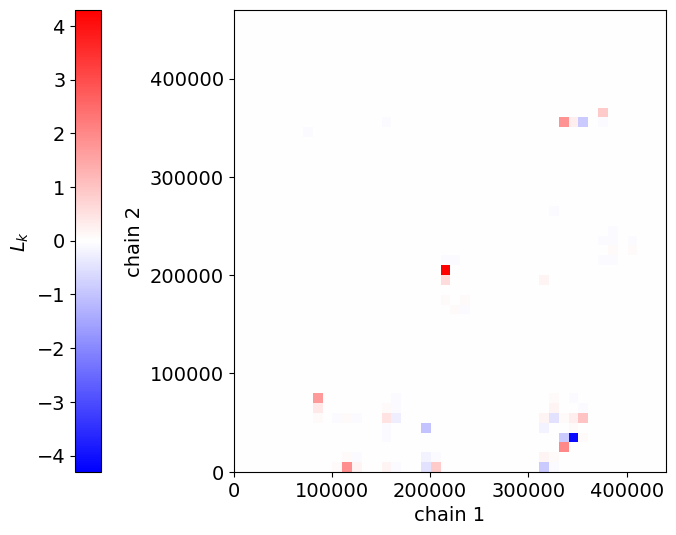

In [19]:
# Visualize a submatrix from the 10000-resolution linking matrix with left-aligned colorbar

dense_matrix3 = matrix3.toarray()
start_row, end_row = 0, 47
start_col, end_col = 0, 44
submatrix3 = dense_matrix3[start_row:end_row, start_col:end_col]

cmap = plt.cm.bwr
vmax = np.abs(submatrix3).max()
vmin = -vmax

# Create figure and gridspec: 1 row, 2 columns (small left for colorbar)
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[0.05, 0.95], wspace=0.4)

# Colorbar axes (left)
cax = fig.add_subplot(gs[0])
# Matrix axes (right)
ax = fig.add_subplot(gs[1])

# Plot matrix
im = ax.imshow(submatrix3, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')
ax.set_aspect('equal', adjustable='box')

# Tick positions computed at block boundaries
block_size = 10000
step = 10
#xticks = np.arange(0, end_col - start_col + step, step) - 0.5
#yticks = np.arange(0, end_row - start_row + step, step) - 0.5
#xlabels = (np.arange(start_col, end_col + step, step) * block_size).astype(int)
#ylabels = (np.arange(start_row, end_row + step, step) * block_size).astype(int)
xticks = np.arange(0, end_col - start_col, step) - 0.5
yticks = np.arange(0, end_row - start_row, step) - 0.5
xlabels = (np.arange(start_col, end_col, step) * block_size).astype(int)
ylabels = (np.arange(start_row, end_row, step) * block_size).astype(int)


ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xlabels, fontsize=14)
ax.set_yticklabels(ylabels, fontsize=14)
ax.set_xlabel('chain 1', fontsize=14)
ax.set_ylabel('chain 2', fontsize=14)

# Add colorbar on the left, aligned with matrix
#fig.colorbar(im, cax=cax, orientation='vertical', label='Lk')
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='Lk')
cbar.ax.yaxis.set_ticks_position('left')       # ticks on the left
cbar.ax.yaxis.set_label_position('left')      # label on the left
cbar.ax.tick_params(labelsize=14)
cbar.set_label('$L_k$', fontsize=14)

plt.savefig("linking_matrix_100x100x100_resolution_10000.pdf", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [20]:
###################################################################################3
# Zoomed submatrix visualizations at 1000-resolution (positive/negative regions)

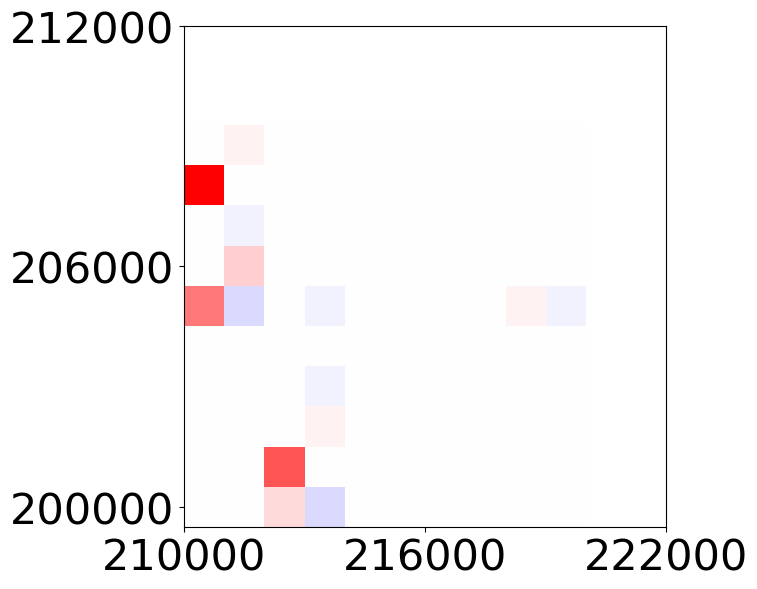

In [21]:
# Positive region submatrix at 1000-resolution

dense_matrix1zp = matrix1zp.toarray()
start_row, end_row = 200, 210
start_col, end_col = 210, 220
submatrix1zp = dense_matrix1zp[start_row:end_row, start_col:end_col]

cmap = plt.cm.bwr
vmax = np.abs(submatrix1zp).max()
vmin = -vmax

plt.figure(figsize=(8, 6))
im = plt.imshow(submatrix1zp, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')

# Define block geometry and compute tick positions/labels at left/bottom edges
block_size = 1000

# Tick *positions* at LEFT/BOTTOM edges → shift by -0.5
step = 6
xticks = np.arange(0, end_col - start_col + step, step) - 0.5
yticks = np.arange(0, end_row - start_row + step, step)

# Tick *labels* (physical coordinates at the left edge of each block)
xlabels = (np.arange(start_col, end_col + step, step) * block_size).astype(int)
ylabels = (np.arange(start_row, end_row + step, step) * block_size).astype(int)

plt.xticks(xticks, xlabels, fontsize=31)
plt.yicks = plt.yticks(yticks, ylabels, fontsize=31)


#plt.title('resolution 1000', fontsize=14)
#plt.xlabel('Chain 1', fontsize=14)
#plt.ylabel('Chain 2', fontsize=14)
#plt.colorbar(im, label='Lk')

plt.savefig("linking_matrix_100x100x100_resolution_1000_positive.png", dpi=300, bbox_inches='tight')

plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

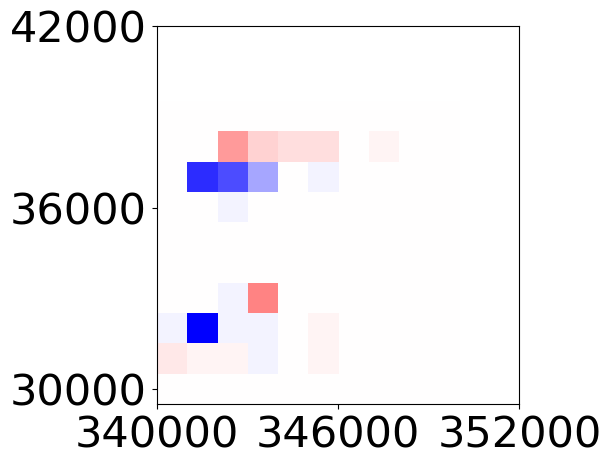

In [22]:
# Negative region submatrix at 1000-resolution

dense_matrix1zm = matrix1zm.toarray()
start_row, end_row = 30, 40
start_col, end_col = 340, 350
submatrix1zm = dense_matrix1zm[start_row:end_row, start_col:end_col]

cmap = plt.cm.bwr
vmax = np.abs(submatrix1zm).max()
vmin = -vmax

plt.figure(figsize=(6, 6))
im = plt.imshow(submatrix1zm, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')

# Define block geometry and compute tick positions/labels
block_size = 1000

# Tick *positions* at LEFT/BOTTOM edges → shift by -0.5
step = 6
xticks = np.arange(0, end_col - start_col + step, step) - 0.5
yticks = np.arange(0, end_row - start_row + step, step) 

# Tick *labels* (physical coordinates at the left edge of each block)
xlabels = (np.arange(start_col, end_col + step, step) * block_size).astype(int)
ylabels = (np.arange(start_row, end_row + step, step) * block_size).astype(int)

plt.xticks(xticks, xlabels, fontsize=31)
plt.yticks(yticks, ylabels, fontsize=31)

#plt.title('resolution 1000', fontsize=14)
#plt.xlabel('Chain 1', fontsize=14)
#plt.ylabel('Chain 2', fontsize=14)
#plt.colorbar(im, label='Lk')

plt.savefig("linking_matrix_100x100x100_resolution_1000_negative.png", dpi=300, bbox_inches='tight')

plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

In [23]:
###################################################################################3
# Zoomed submatrix visualizations at 100-resolution (positive/negative regions)

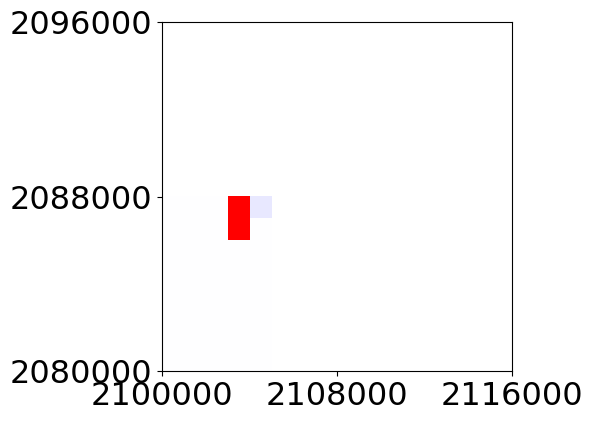

In [24]:
# Positive region submatrix at 100-resolution

dense_matrix2zp = matrix2zp.toarray()
start_row, end_row = 2080, 2090
start_col, end_col = 2100, 2110
submatrix2zp = dense_matrix2zp[start_row:end_row, start_col:end_col]

cmap = plt.cm.bwr
vmax = np.abs(submatrix2zp).max()
vmin = -vmax

plt.figure(figsize=(6, 6))
im = plt.imshow(submatrix2zp, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')

# Define block geometry and compute tick positions/labels
block_size = 1000

# Tick *positions* at LEFT/BOTTOM edges → shift by -0.5
step = 8
xticks = np.arange(0, end_col - start_col + step, step) - 0.5
yticks = np.arange(0, end_row - start_row + step, step) - 0.5

# Tick *labels* (physical coordinates at the left edge of each block)
xlabels = (np.arange(start_col, end_col + step, step) * block_size).astype(int)
ylabels = (np.arange(start_row, end_row + step, step) * block_size).astype(int)

plt.xticks(xticks, xlabels, fontsize=23)
plt.yticks(yticks, ylabels, fontsize=23)

#plt.title('resolution 100', fontsize=14)
#plt.xlabel('Chain 1', fontsize=14)
#plt.ylabel('Chain 2', fontsize=14)
#plt.colorbar(im, label='Lk')

plt.savefig("linking_matrix_100x100x100_resolution_100_positive.png", dpi=300, bbox_inches='tight')

plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

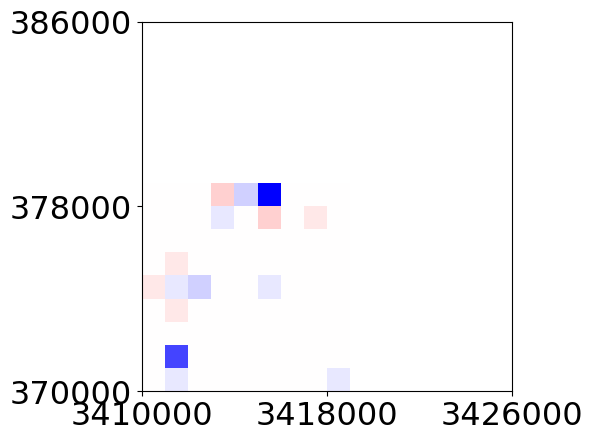

In [25]:
# Negative region submatrix at 100-resolution

dense_matrix2zm = matrix2zm.toarray()
start_row, end_row = 370, 380
start_col, end_col = 3410, 3420
submatrix2zm = dense_matrix2zm[start_row:end_row, start_col:end_col]

cmap = plt.cm.bwr
vmax = np.abs(submatrix2zm).max()
vmin = -vmax

plt.figure(figsize=(6, 6))
im = plt.imshow(submatrix2zm, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')

# Define block geometry and compute tick positions/labels
block_size = 1000

# Tick *positions* at LEFT/BOTTOM edges → shift by -0.5
step = 8
xticks = np.arange(0, end_col - start_col + step, step) - 0.5
yticks = np.arange(0, end_row - start_row + step, step) - 0.5

# Tick *labels* (physical coordinates at the left edge of each block)
xlabels = (np.arange(start_col, end_col + step, step) * block_size).astype(int)
ylabels = (np.arange(start_row, end_row + step, step) * block_size).astype(int)

plt.xticks(xticks, xlabels, fontsize=23)
plt.yticks(yticks, ylabels, fontsize=23)

#plt.title('resolution 100', fontsize=14)
#plt.xlabel('Chain 1', fontsize=14)
#plt.ylabel('Chain 2', fontsize=14)
#plt.colorbar(im, label='Lk')

plt.savefig("linking_matrix_100x100x100_resolution_100_negative.png", dpi=300, bbox_inches='tight')

plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()